# Importaciones 

In [106]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import os
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from copy import deepcopy
import math
from scipy.stats import norm
import pandas_datareader.data as web
import yfinance as yf
from pandas.tseries.offsets import MonthEnd
import calendar
from sklearn.metrics import r2_score
from itertools import cycle, islice
%matplotlib inline
plt.style.use('ggplot')# Filtrado y acomodo de datos

pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.8f}'.format

# Filtrado y acomodo de datos

In [2]:
# Lista manual de abreviaturas de meses en español
meses = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']


# Función para convertir la fecha a formato estándar
def convertir_fecha(fecha):
    mes_abr, ano = fecha.split(' ')
    mes_numero = meses.index(mes_abr) + 1  # +1 porque enero es 1, febrero es 2, etc.
    ano_completo = '20' + ano.strip("'")
    return f"01-{mes_numero:02d}-{ano_completo}"

<AxesSubplot: title={'center': 'RA'}, xlabel='Fecha'>

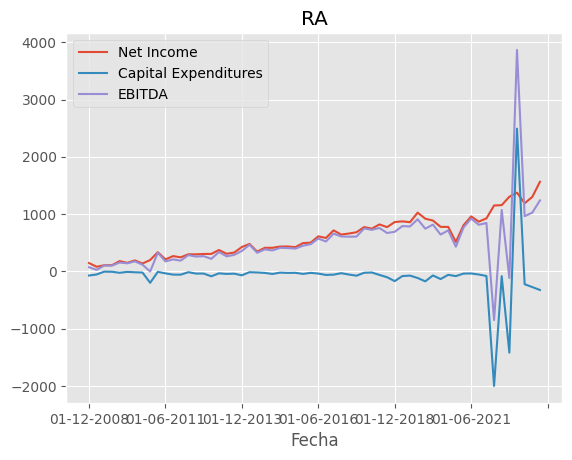

In [3]:
#Depreciaciones y Apreciaciones
cashflow_ra = pd.read_excel('CashFlow_RA.xlsx', skiprows = range(0, 7))
cf_ra = cashflow_ra.copy()
cf_ra = cf_ra.drop(0,axis=0)
cols = list(cf_ra.columns)
cols[0] = 'CONCEPT'
cf_ra.columns = cols
cf_ra = cf_ra.set_index('CONCEPT')

#Utilidad después de Impuestos
incomestatement_ra = pd.read_excel('Income_RA.xlsx', skiprows = range(0, 7))
is_ra = incomestatement_ra.copy()
is_ra = is_ra.drop(0,axis=0)
cols = list(is_ra.columns)
cols[0] = 'CONCEPT'
is_ra.columns = cols
is_ra = is_ra.set_index('CONCEPT')

#Obtener EBITDA
df_ra = pd.concat([is_ra.T[['Net Income']],cf_ra.T[['Capital Expenditures']]], axis=1)
df_ra['EBITDA'] = df_ra['Net Income'] + df_ra['Capital Expenditures']
df_ra = df_ra.iloc[::-1]
cf_ra.T['Capital Expenditures']

df_ra = df_ra.reset_index()
df_ra
df_ra['index'] = df_ra['index'].apply(convertir_fecha)
df_ra.columns = ['Fecha','Net Income', 'Capital Expenditures', 'EBITDA']
df_ra = df_ra.set_index('Fecha')

df_ra.plot(title="RA")

<AxesSubplot: title={'center': 'BBAJIOO'}, xlabel='Fecha'>

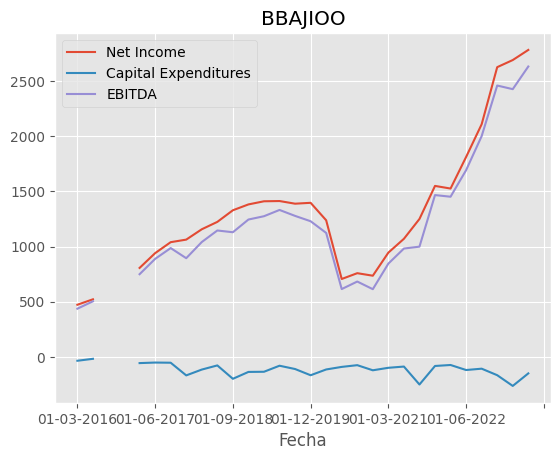

In [4]:
#Depreciaciones y Apreciaciones
cashflow_bbajioo = pd.read_excel('CashFlow_BBAJIOO.xlsx', skiprows = range(0, 7))
cf_bbajioo = cashflow_bbajioo.copy()
cf_bbajioo = cf_bbajioo.drop(0,axis=0)
cols = list(cf_bbajioo.columns)
cols[0] = 'CONCEPT'
cf_bbajioo.columns = cols
cf_bbajioo = cf_bbajioo.set_index('CONCEPT')

#Utilidad después de Impuestos
incomestatement_bbajioo = pd.read_excel('Income_BBAJIOO.xlsx', skiprows = range(0, 7))
is_bbajioo = incomestatement_bbajioo.copy()
is_bbajioo = is_bbajioo.drop(0,axis=0)
cols = list(is_bbajioo.columns)
cols[0] = 'CONCEPT'
is_bbajioo.columns = cols
is_bbajioo = is_bbajioo.set_index('CONCEPT')

#Obtener EBITDA
df_bbajioo = pd.concat([is_bbajioo.T[['Net Income']],cf_bbajioo.T[['Capital Expenditures']]], axis=1)
df_bbajioo['EBITDA'] = df_bbajioo['Net Income'] + df_bbajioo['Capital Expenditures']
df_bbajioo = df_bbajioo.iloc[::-1]
cf_bbajioo.T['Capital Expenditures']

df_bbajioo = df_bbajioo.reset_index()
df_bbajioo
df_bbajioo['index'] = df_bbajioo['index'].apply(convertir_fecha)
df_bbajioo.columns = ['Fecha','Net Income', 'Capital Expenditures', 'EBITDA']
df_bbajioo = df_bbajioo.set_index('Fecha')

df_bbajioo.plot(title="BBAJIOO")

<AxesSubplot: title={'center': 'GFNORTEO'}, xlabel='Fecha'>

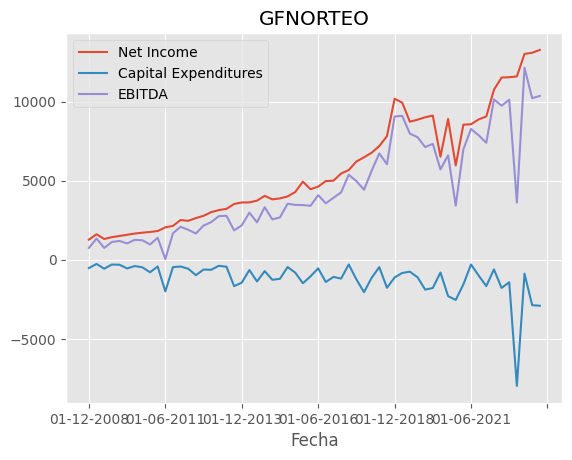

In [5]:
#Depreciaciones y Apreciaciones
cashflow_gfnorteo = pd.read_excel('CashFlow_GFNORTEO.xlsx', skiprows = range(0, 7))
cf_gfnorteo = cashflow_gfnorteo.copy()
cf_gfnorteo = cf_gfnorteo.drop(0,axis=0)
cols = list(cf_gfnorteo.columns)
cols[0] = 'CONCEPT'
cf_gfnorteo.columns = cols
cf_gfnorteo = cf_gfnorteo.set_index('CONCEPT')

#Utilidad después de Impuestos
incomestatement_gfnorteo = pd.read_excel('Income_GFNORTEO.xlsx', skiprows = range(0, 7))
is_gfnorteo = incomestatement_gfnorteo.copy()
is_gfnorteo = is_gfnorteo.drop(0,axis=0)
cols = list(is_gfnorteo.columns)
cols[0] = 'CONCEPT'
is_gfnorteo.columns = cols
is_gfnorteo = is_gfnorteo.set_index('CONCEPT')

#Obtener EBITDA
df_gfnorteo = pd.concat([is_gfnorteo.T[['Net Income']],cf_gfnorteo.T[['Capital Expenditures']]], axis=1)
df_gfnorteo['EBITDA'] = df_gfnorteo['Net Income'] + df_gfnorteo['Capital Expenditures']
df_gfnorteo = df_gfnorteo.iloc[::-1]
cf_gfnorteo.T['Capital Expenditures']

df_gfnorteo = df_gfnorteo.reset_index()
df_gfnorteo
df_gfnorteo['index'] = df_gfnorteo['index'].apply(convertir_fecha)
df_gfnorteo.columns = ['Fecha','Net Income', 'Capital Expenditures', 'EBITDA']
df_gfnorteo = df_gfnorteo.set_index('Fecha')

df_gfnorteo.plot(title="GFNORTEO")

<AxesSubplot: title={'center': 'gfinburo'}, xlabel='Fecha'>

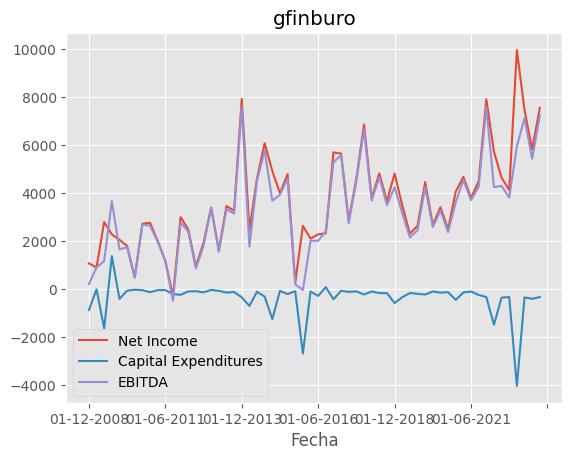

In [6]:
#Depreciaciones y Apreciaciones
cashflow_gfinburo = pd.read_excel('CashFlow_GFINBURO.xlsx', skiprows = range(0, 7))
cf_gfinburo = cashflow_gfinburo.copy()
cf_gfinburo = cf_gfinburo.drop(0,axis=0)
cols = list(cf_gfinburo.columns)
cols[0] = 'CONCEPT'
cf_gfinburo.columns = cols
cf_gfinburo = cf_gfinburo.set_index('CONCEPT')

#Utilidad después de Impuestos
incomestatement_gfinburo = pd.read_excel('Income_GFINBURO.xlsx', skiprows = range(0, 7))
is_gfinburo = incomestatement_gfinburo.copy()
is_gfinburo = is_gfinburo.drop(0,axis=0)
cols = list(is_gfinburo.columns)
cols[0] = 'CONCEPT'
is_gfinburo.columns = cols
is_gfinburo = is_gfinburo.set_index('CONCEPT')

#Obtener EBITDA
df_gfinburo = pd.concat([is_gfinburo.T[['Net Income']],cf_gfinburo.T[['Capital Expenditures']]], axis=1)
df_gfinburo['EBITDA'] = df_gfinburo['Net Income'] + df_gfinburo['Capital Expenditures']
df_gfinburo = df_gfinburo.iloc[::-1]
cf_gfinburo.T['Capital Expenditures']

df_gfinburo = df_gfinburo.reset_index()
df_gfinburo
df_gfinburo['index'] = df_gfinburo['index'].apply(convertir_fecha)
df_gfinburo.columns = ['Fecha','Net Income', 'Capital Expenditures', 'EBITDA']
df_gfinburo = df_gfinburo.set_index('Fecha')

df_gfinburo.plot(title="gfinburo")

# Tratamiento de nulos

Sólo BBAJIOO tiene datos faltantes, por lo que sólo a este se le van a llenar estos datos para facilitar la caminata aleatoria más adelante

C:\Users\patri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\patri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


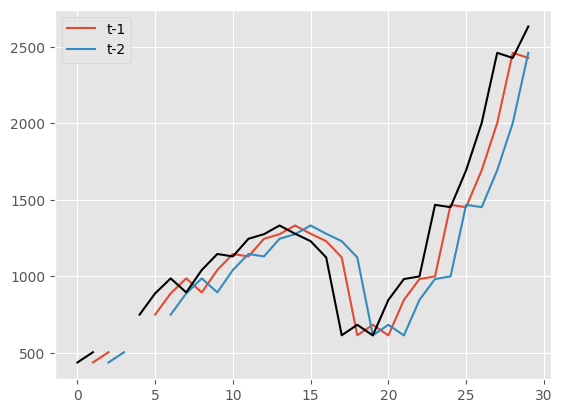

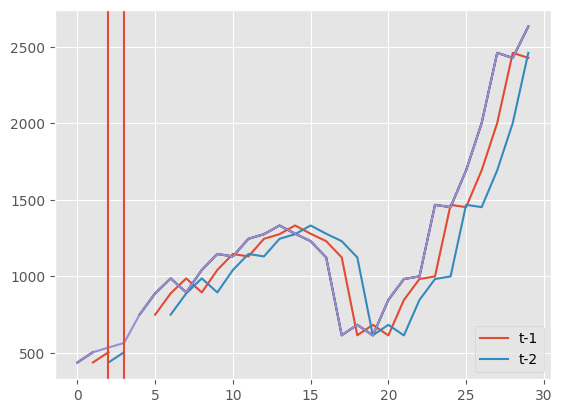

In [7]:
# Creando lags
lags = list(range(1, 3, 1)) 

lagged_frame = pd.DataFrame (data = None, columns = ['t'] + [f't-{d}' for d in lags])
lagged_frame['t'] = df_bbajioo['EBITDA'].values

for lag in lags: 
    lagged_frame[f't-{lag}'] = lagged_frame['t'].shift(lag) 

lag_names = [f't-{lag}' for lag in lags] 
lagged_frame[lag_names].plot()
lagged_frame['t'].plot(color = 'black')

lagged_copy = lagged_frame.copy()
lagged_copy2 = lagged_frame.copy()

lagged_copy.dropna(inplace = True)

modelo = LinearRegression()
response = ['t'] 

predictores = sorted(set(lagged_copy.columns).difference(response))

modelo.fit(lagged_copy[predictores], lagged_copy[response]) 

lagged_frame.loc[lagged_frame['t'].isnull()]

df_to_estimate = lagged_frame.loc[lagged_frame['t'].isnull()].copy()
index_datos_a_estimar = df_to_estimate.index.tolist()

lag_names = [f't-{lag}' for lag in lags] 
lagged_frame[lag_names].plot()
lagged_frame['t'].plot(color = 'black')

lagged_copy = lagged_frame.copy()
lagged_copy2 = lagged_frame.copy()

lagged_copy.dropna(inplace = True)

modelo = LinearRegression()
response = ['t'] 

predictores = sorted(set(lagged_copy.columns).difference(response))

modelo.fit(lagged_copy[predictores], lagged_copy[response]) 

lagged_frame.loc[lagged_frame['t'].isnull()]

df_to_estimate = lagged_frame.loc[lagged_frame['t'].isnull()].copy()
index_datos_a_estimar = df_to_estimate.index.tolist()
index_datos_a_estimar

estimaciones = [] 
primera_posicion = min(index_datos_a_estimar) 

#Se hace un reshape porque la libreria skit, trabaja mejor con columnas, ya que en algunos casos puede dar error 
values_reshape = df_to_estimate.loc[primera_posicion, predictores].values.reshape(1, -1)

values_reshape = np.array([x for x in values_reshape[0] if not np.isnan(x)])
values_reshape
# Asegúrate de que el arreglo tenga dos dimensiones

# Asegúrate de que el arreglo tenga dos dimensiones
values_reshape = values_reshape.reshape(1, -1)

values_reshape

#El primer 0 me da un arreglo y el segundo me arroja el dato 
estimaciones.append(modelo.predict(values_reshape)[0][0])

# Colocando las respuestas en un copy 
lagged_copy2.loc[primera_posicion, 't'] = estimaciones[0]
lagged_copy2.loc[index_datos_a_estimar]

for lag in lags: 
    lagged_copy2[f't-{lag}'] = lagged_copy2['t'].shift(lag)

for posicion, index in enumerate(index_datos_a_estimar[1:]):
    #Reshape 
    values_reshape = lagged_copy2.loc[index, predictores].values.reshape(1, - 1)

    #Estimacion 
    estimaciones.append(modelo.predict(values_reshape)[0][0])

    #Colocar estimaciones 
    lagged_copy2.loc[index, 't'] = estimaciones[posicion + 1]
    for lag in lags: 
        lagged_copy2[f't-{lag}'] = lagged_copy2['t'].shift(lag)

lagged_copy2['t'].plot()
plt.axvline(min(index_datos_a_estimar))
plt.axvline(max(index_datos_a_estimar))

datos_con_serie = lagged_copy2['t']
datos_con_serie

lista_net = []
datos_lista = list(datos_con_serie)
for i in range(len(datos_lista)):
    dato = datos_lista[i]
    lista_net.append(dato)
    
datos_con_serie

df_bbajioo['EBITDA'] = lista_net

<AxesSubplot: xlabel='Fecha'>

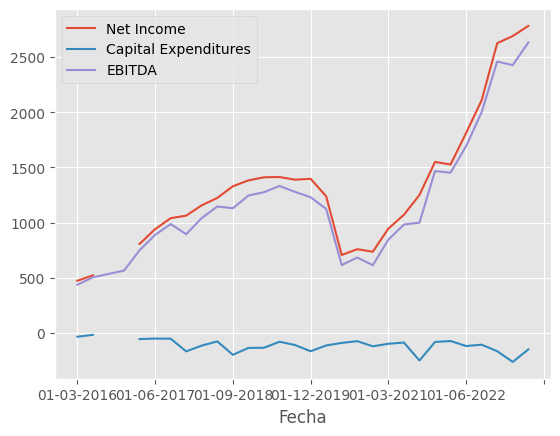

In [8]:
df_bbajioo.plot()

# Calculando el error con RSME (Actividad para despues) 

Para calcular el grado de mejorar de llenar los datos faltantes con la misma serie de tiempo, haremos una comparacion de error

Tomemos nuestros datos reales y comparemos con las estimaciones. Para medición del error usaremos el RMSE. 

$$\text{RMSE} = \frac{1}{n} \sum_{i=0}^n \sqrt[2]{(y_i - \hat{y_i})^2}$$

In [9]:
# Importando la libreria para hacer las estimaciones
from sklearn.metrics import mean_squared_error

# Caminata Aleatoria

### El valor n de cada paso en la caminata está dado por:

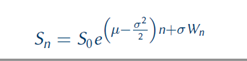

Donde 
- S0 es el resultado de la suma de los valores presentes del **EBITDA** dividido por el total presente de las acciones
- mu es la media del cambio de los precios de las acciones
- sigma es la desviación estándar de la volatilidad de dichos precios
- Wn A


## Tasa de interés
Para obtener la tasa de interés a través de la cual se obtendrán los Valores Presentes, se utiliza la WACC, que es la tasa a la que se debe descontar el FCF para obtener el mismo valor de las acciones que proporciona el descuento de los flujos para el accionista.

## Mu
Es la media del cambio de las acciones. Ya que dicha media puede variar de manera relativamente aleatoria, se realiza un análisis (ARCH, GARCH?) bla bla bla

## Sigma
Desviación estandar etc etc.

El valor de mu y sigma se obtienen de:
https://docs.google.com/spreadsheets/d/1IabCVLK_BPNN-PdPJ3VOSVb92bgREzLn/edit#gid=101703755
    
** Recordar que desviación estándar es la raíz de Varianza 

In [10]:
lista_df = [df_ra,df_bbajioo,df_gfnorteo,df_gfinburo]

## mus y varianzas calculadas con ARIMA 
mus = [0.00083766, 0.000818744762, 0.0005919346, 0.000402123]
varianzas = [0.000368221, 0.0003983685, 0.0005421106, 0.0004551817]

num_acciones = [327931328, 1189931648, 2883456512, 6109817778]
waccs = [0.3738814370703385, 0.19666942718011782, 0.4259933900291548, 0.23912382934958756]

#recordando que sigma es la raíz de varianza:
sigmas = list(np.sqrt(varianzas))

In [11]:
#Checar WACC, Tasa libre de riesgo y Tasa del mercado.
#Valor presente pythonizado:  xi/((1+tasa interés)**i)

# ##AQUI IRÍA WACC ANUAL
# tasa_anual = 0.041
# #tasa interes
# tasa_trim = tasa_anual/4

lista_df_caminata = []
for i in range(len(lista_df)):
    df = lista_df[i]
    tasa = waccs[i]
    #calculo de pv
    lista_pv = []
    #npv
    npv = 0
    for j in range(len(df)):
        lista_ebitda = list(df['EBITDA'])
        xj = lista_ebitda[j]
        den = xj
        num = ((1+tasa)**i)
        pv = den/num
        npv += pv
        lista_pv.append(pv)

    df_sim = pd.DataFrame([lista_net,lista_pv])
    df_sim = df_sim.T
    df_sim.columns = ['EBITDA','PV']
    lista_df_caminata.append(df_sim)
# lista_df_caminata

In [12]:
num_caminatas = 1000
datos_a_simular = 60

lista_df_resultados = []
for h in range(len(lista_df_caminata)):
    df = lista_df_caminata[h]
    mu=mus[h]
    sigma = sigmas[h]
    shares = num_acciones[h]
    s0 = (df['PV'].sum())/shares


    res_caminatas = []

    for i in range(num_caminatas):
        caminata=[s0]
        for j in range(datos_a_simular):
            random = np.random.rand()
            inicial = caminata[j]
            sig = inicial*m.exp(
                (mu-((sigma*sigma)/2))+
                sigma * norm.ppf(random)
                               )
            sig = round(sig,6)

            caminata.append(sig)
        res_caminatas.append(caminata)
        print("df #",h,", Caminata #",i)

    df_caminatas = pd.DataFrame(res_caminatas)
    df_caminatas = df_caminatas.transpose()

    l_prom = []
    for i in range(len(df_caminatas)):
        prom = np.mean(df_caminatas.loc[i])
        l_prom.append(prom)
        
    l_median = []
    for i in range(len(df_caminatas)):
        median = np.median(df_caminatas.loc[i])
        l_median.append(median)

    df_caminatas['Tendencia'] = l_prom
    df_caminatas['Mediana'] = l_median

    lista_df_resultados.append(df_caminatas)
lista_df_resultados

df # 0 , Caminata # 0
df # 0 , Caminata # 1
df # 0 , Caminata # 2
df # 0 , Caminata # 3
df # 0 , Caminata # 4
df # 0 , Caminata # 5
df # 0 , Caminata # 6
df # 0 , Caminata # 7
df # 0 , Caminata # 8
df # 0 , Caminata # 9
df # 0 , Caminata # 10
df # 0 , Caminata # 11
df # 0 , Caminata # 12
df # 0 , Caminata # 13
df # 0 , Caminata # 14
df # 0 , Caminata # 15
df # 0 , Caminata # 16
df # 0 , Caminata # 17
df # 0 , Caminata # 18
df # 0 , Caminata # 19
df # 0 , Caminata # 20
df # 0 , Caminata # 21
df # 0 , Caminata # 22
df # 0 , Caminata # 23
df # 0 , Caminata # 24
df # 0 , Caminata # 25
df # 0 , Caminata # 26
df # 0 , Caminata # 27
df # 0 , Caminata # 28
df # 0 , Caminata # 29
df # 0 , Caminata # 30
df # 0 , Caminata # 31
df # 0 , Caminata # 32
df # 0 , Caminata # 33
df # 0 , Caminata # 34
df # 0 , Caminata # 35
df # 0 , Caminata # 36
df # 0 , Caminata # 37
df # 0 , Caminata # 38
df # 0 , Caminata # 39
df # 0 , Caminata # 40
df # 0 , Caminata # 41
df # 0 , Caminata # 42
df # 0 , Caminata # 4

df # 0 , Caminata # 364
df # 0 , Caminata # 365
df # 0 , Caminata # 366
df # 0 , Caminata # 367
df # 0 , Caminata # 368
df # 0 , Caminata # 369
df # 0 , Caminata # 370
df # 0 , Caminata # 371
df # 0 , Caminata # 372
df # 0 , Caminata # 373
df # 0 , Caminata # 374
df # 0 , Caminata # 375
df # 0 , Caminata # 376
df # 0 , Caminata # 377
df # 0 , Caminata # 378
df # 0 , Caminata # 379
df # 0 , Caminata # 380
df # 0 , Caminata # 381
df # 0 , Caminata # 382
df # 0 , Caminata # 383
df # 0 , Caminata # 384
df # 0 , Caminata # 385
df # 0 , Caminata # 386
df # 0 , Caminata # 387
df # 0 , Caminata # 388
df # 0 , Caminata # 389
df # 0 , Caminata # 390
df # 0 , Caminata # 391
df # 0 , Caminata # 392
df # 0 , Caminata # 393
df # 0 , Caminata # 394
df # 0 , Caminata # 395
df # 0 , Caminata # 396
df # 0 , Caminata # 397
df # 0 , Caminata # 398
df # 0 , Caminata # 399
df # 0 , Caminata # 400
df # 0 , Caminata # 401
df # 0 , Caminata # 402
df # 0 , Caminata # 403
df # 0 , Caminata # 404
df # 0 , Caminat

df # 0 , Caminata # 713
df # 0 , Caminata # 714
df # 0 , Caminata # 715
df # 0 , Caminata # 716
df # 0 , Caminata # 717
df # 0 , Caminata # 718
df # 0 , Caminata # 719
df # 0 , Caminata # 720
df # 0 , Caminata # 721
df # 0 , Caminata # 722
df # 0 , Caminata # 723
df # 0 , Caminata # 724
df # 0 , Caminata # 725
df # 0 , Caminata # 726
df # 0 , Caminata # 727
df # 0 , Caminata # 728
df # 0 , Caminata # 729
df # 0 , Caminata # 730
df # 0 , Caminata # 731
df # 0 , Caminata # 732
df # 0 , Caminata # 733
df # 0 , Caminata # 734
df # 0 , Caminata # 735
df # 0 , Caminata # 736
df # 0 , Caminata # 737
df # 0 , Caminata # 738
df # 0 , Caminata # 739
df # 0 , Caminata # 740
df # 0 , Caminata # 741
df # 0 , Caminata # 742
df # 0 , Caminata # 743
df # 0 , Caminata # 744
df # 0 , Caminata # 745
df # 0 , Caminata # 746
df # 0 , Caminata # 747
df # 0 , Caminata # 748
df # 0 , Caminata # 749
df # 0 , Caminata # 750
df # 0 , Caminata # 751
df # 0 , Caminata # 752
df # 0 , Caminata # 753
df # 0 , Caminat

df # 1 , Caminata # 107
df # 1 , Caminata # 108
df # 1 , Caminata # 109
df # 1 , Caminata # 110
df # 1 , Caminata # 111
df # 1 , Caminata # 112
df # 1 , Caminata # 113
df # 1 , Caminata # 114
df # 1 , Caminata # 115
df # 1 , Caminata # 116
df # 1 , Caminata # 117
df # 1 , Caminata # 118
df # 1 , Caminata # 119
df # 1 , Caminata # 120
df # 1 , Caminata # 121
df # 1 , Caminata # 122
df # 1 , Caminata # 123
df # 1 , Caminata # 124
df # 1 , Caminata # 125
df # 1 , Caminata # 126
df # 1 , Caminata # 127
df # 1 , Caminata # 128
df # 1 , Caminata # 129
df # 1 , Caminata # 130
df # 1 , Caminata # 131
df # 1 , Caminata # 132
df # 1 , Caminata # 133
df # 1 , Caminata # 134
df # 1 , Caminata # 135
df # 1 , Caminata # 136
df # 1 , Caminata # 137
df # 1 , Caminata # 138
df # 1 , Caminata # 139
df # 1 , Caminata # 140
df # 1 , Caminata # 141
df # 1 , Caminata # 142
df # 1 , Caminata # 143
df # 1 , Caminata # 144
df # 1 , Caminata # 145
df # 1 , Caminata # 146
df # 1 , Caminata # 147
df # 1 , Caminat

df # 1 , Caminata # 456
df # 1 , Caminata # 457
df # 1 , Caminata # 458
df # 1 , Caminata # 459
df # 1 , Caminata # 460
df # 1 , Caminata # 461
df # 1 , Caminata # 462
df # 1 , Caminata # 463
df # 1 , Caminata # 464
df # 1 , Caminata # 465
df # 1 , Caminata # 466
df # 1 , Caminata # 467
df # 1 , Caminata # 468
df # 1 , Caminata # 469
df # 1 , Caminata # 470
df # 1 , Caminata # 471
df # 1 , Caminata # 472
df # 1 , Caminata # 473
df # 1 , Caminata # 474
df # 1 , Caminata # 475
df # 1 , Caminata # 476
df # 1 , Caminata # 477
df # 1 , Caminata # 478
df # 1 , Caminata # 479
df # 1 , Caminata # 480
df # 1 , Caminata # 481
df # 1 , Caminata # 482
df # 1 , Caminata # 483
df # 1 , Caminata # 484
df # 1 , Caminata # 485
df # 1 , Caminata # 486
df # 1 , Caminata # 487
df # 1 , Caminata # 488
df # 1 , Caminata # 489
df # 1 , Caminata # 490
df # 1 , Caminata # 491
df # 1 , Caminata # 492
df # 1 , Caminata # 493
df # 1 , Caminata # 494
df # 1 , Caminata # 495
df # 1 , Caminata # 496
df # 1 , Caminat

df # 1 , Caminata # 806
df # 1 , Caminata # 807
df # 1 , Caminata # 808
df # 1 , Caminata # 809
df # 1 , Caminata # 810
df # 1 , Caminata # 811
df # 1 , Caminata # 812
df # 1 , Caminata # 813
df # 1 , Caminata # 814
df # 1 , Caminata # 815
df # 1 , Caminata # 816
df # 1 , Caminata # 817
df # 1 , Caminata # 818
df # 1 , Caminata # 819
df # 1 , Caminata # 820
df # 1 , Caminata # 821
df # 1 , Caminata # 822
df # 1 , Caminata # 823
df # 1 , Caminata # 824
df # 1 , Caminata # 825
df # 1 , Caminata # 826
df # 1 , Caminata # 827
df # 1 , Caminata # 828
df # 1 , Caminata # 829
df # 1 , Caminata # 830
df # 1 , Caminata # 831
df # 1 , Caminata # 832
df # 1 , Caminata # 833
df # 1 , Caminata # 834
df # 1 , Caminata # 835
df # 1 , Caminata # 836
df # 1 , Caminata # 837
df # 1 , Caminata # 838
df # 1 , Caminata # 839
df # 1 , Caminata # 840
df # 1 , Caminata # 841
df # 1 , Caminata # 842
df # 1 , Caminata # 843
df # 1 , Caminata # 844
df # 1 , Caminata # 845
df # 1 , Caminata # 846
df # 1 , Caminat

df # 2 , Caminata # 192
df # 2 , Caminata # 193
df # 2 , Caminata # 194
df # 2 , Caminata # 195
df # 2 , Caminata # 196
df # 2 , Caminata # 197
df # 2 , Caminata # 198
df # 2 , Caminata # 199
df # 2 , Caminata # 200
df # 2 , Caminata # 201
df # 2 , Caminata # 202
df # 2 , Caminata # 203
df # 2 , Caminata # 204
df # 2 , Caminata # 205
df # 2 , Caminata # 206
df # 2 , Caminata # 207
df # 2 , Caminata # 208
df # 2 , Caminata # 209
df # 2 , Caminata # 210
df # 2 , Caminata # 211
df # 2 , Caminata # 212
df # 2 , Caminata # 213
df # 2 , Caminata # 214
df # 2 , Caminata # 215
df # 2 , Caminata # 216
df # 2 , Caminata # 217
df # 2 , Caminata # 218
df # 2 , Caminata # 219
df # 2 , Caminata # 220
df # 2 , Caminata # 221
df # 2 , Caminata # 222
df # 2 , Caminata # 223
df # 2 , Caminata # 224
df # 2 , Caminata # 225
df # 2 , Caminata # 226
df # 2 , Caminata # 227
df # 2 , Caminata # 228
df # 2 , Caminata # 229
df # 2 , Caminata # 230
df # 2 , Caminata # 231
df # 2 , Caminata # 232
df # 2 , Caminat

df # 2 , Caminata # 554
df # 2 , Caminata # 555
df # 2 , Caminata # 556
df # 2 , Caminata # 557
df # 2 , Caminata # 558
df # 2 , Caminata # 559
df # 2 , Caminata # 560
df # 2 , Caminata # 561
df # 2 , Caminata # 562
df # 2 , Caminata # 563
df # 2 , Caminata # 564
df # 2 , Caminata # 565
df # 2 , Caminata # 566
df # 2 , Caminata # 567
df # 2 , Caminata # 568
df # 2 , Caminata # 569
df # 2 , Caminata # 570
df # 2 , Caminata # 571
df # 2 , Caminata # 572
df # 2 , Caminata # 573
df # 2 , Caminata # 574
df # 2 , Caminata # 575
df # 2 , Caminata # 576
df # 2 , Caminata # 577
df # 2 , Caminata # 578
df # 2 , Caminata # 579
df # 2 , Caminata # 580
df # 2 , Caminata # 581
df # 2 , Caminata # 582
df # 2 , Caminata # 583
df # 2 , Caminata # 584
df # 2 , Caminata # 585
df # 2 , Caminata # 586
df # 2 , Caminata # 587
df # 2 , Caminata # 588
df # 2 , Caminata # 589
df # 2 , Caminata # 590
df # 2 , Caminata # 591
df # 2 , Caminata # 592
df # 2 , Caminata # 593
df # 2 , Caminata # 594
df # 2 , Caminat

df # 2 , Caminata # 905
df # 2 , Caminata # 906
df # 2 , Caminata # 907
df # 2 , Caminata # 908
df # 2 , Caminata # 909
df # 2 , Caminata # 910
df # 2 , Caminata # 911
df # 2 , Caminata # 912
df # 2 , Caminata # 913
df # 2 , Caminata # 914
df # 2 , Caminata # 915
df # 2 , Caminata # 916
df # 2 , Caminata # 917
df # 2 , Caminata # 918
df # 2 , Caminata # 919
df # 2 , Caminata # 920
df # 2 , Caminata # 921
df # 2 , Caminata # 922
df # 2 , Caminata # 923
df # 2 , Caminata # 924
df # 2 , Caminata # 925
df # 2 , Caminata # 926
df # 2 , Caminata # 927
df # 2 , Caminata # 928
df # 2 , Caminata # 929
df # 2 , Caminata # 930
df # 2 , Caminata # 931
df # 2 , Caminata # 932
df # 2 , Caminata # 933
df # 2 , Caminata # 934
df # 2 , Caminata # 935
df # 2 , Caminata # 936
df # 2 , Caminata # 937
df # 2 , Caminata # 938
df # 2 , Caminata # 939
df # 2 , Caminata # 940
df # 2 , Caminata # 941
df # 2 , Caminata # 942
df # 2 , Caminata # 943
df # 2 , Caminata # 944
df # 2 , Caminata # 945
df # 2 , Caminat

df # 3 , Caminata # 286
df # 3 , Caminata # 287
df # 3 , Caminata # 288
df # 3 , Caminata # 289
df # 3 , Caminata # 290
df # 3 , Caminata # 291
df # 3 , Caminata # 292
df # 3 , Caminata # 293
df # 3 , Caminata # 294
df # 3 , Caminata # 295
df # 3 , Caminata # 296
df # 3 , Caminata # 297
df # 3 , Caminata # 298
df # 3 , Caminata # 299
df # 3 , Caminata # 300
df # 3 , Caminata # 301
df # 3 , Caminata # 302
df # 3 , Caminata # 303
df # 3 , Caminata # 304
df # 3 , Caminata # 305
df # 3 , Caminata # 306
df # 3 , Caminata # 307
df # 3 , Caminata # 308
df # 3 , Caminata # 309
df # 3 , Caminata # 310
df # 3 , Caminata # 311
df # 3 , Caminata # 312
df # 3 , Caminata # 313
df # 3 , Caminata # 314
df # 3 , Caminata # 315
df # 3 , Caminata # 316
df # 3 , Caminata # 317
df # 3 , Caminata # 318
df # 3 , Caminata # 319
df # 3 , Caminata # 320
df # 3 , Caminata # 321
df # 3 , Caminata # 322
df # 3 , Caminata # 323
df # 3 , Caminata # 324
df # 3 , Caminata # 325
df # 3 , Caminata # 326
df # 3 , Caminat

df # 3 , Caminata # 639
df # 3 , Caminata # 640
df # 3 , Caminata # 641
df # 3 , Caminata # 642
df # 3 , Caminata # 643
df # 3 , Caminata # 644
df # 3 , Caminata # 645
df # 3 , Caminata # 646
df # 3 , Caminata # 647
df # 3 , Caminata # 648
df # 3 , Caminata # 649
df # 3 , Caminata # 650
df # 3 , Caminata # 651
df # 3 , Caminata # 652
df # 3 , Caminata # 653
df # 3 , Caminata # 654
df # 3 , Caminata # 655
df # 3 , Caminata # 656
df # 3 , Caminata # 657
df # 3 , Caminata # 658
df # 3 , Caminata # 659
df # 3 , Caminata # 660
df # 3 , Caminata # 661
df # 3 , Caminata # 662
df # 3 , Caminata # 663
df # 3 , Caminata # 664
df # 3 , Caminata # 665
df # 3 , Caminata # 666
df # 3 , Caminata # 667
df # 3 , Caminata # 668
df # 3 , Caminata # 669
df # 3 , Caminata # 670
df # 3 , Caminata # 671
df # 3 , Caminata # 672
df # 3 , Caminata # 673
df # 3 , Caminata # 674
df # 3 , Caminata # 675
df # 3 , Caminata # 676
df # 3 , Caminata # 677
df # 3 , Caminata # 678
df # 3 , Caminata # 679
df # 3 , Caminat

[           0         1         2         3         4         5         6  \
 0   0.000095  0.000095  0.000095  0.000095  0.000095  0.000095  0.000095   
 1   0.000096  0.000096  0.000095  0.000099  0.000093  0.000095  0.000100   
 2   0.000095  0.000096  0.000098  0.000100  0.000091  0.000097  0.000101   
 3   0.000090  0.000092  0.000096  0.000105  0.000092  0.000099  0.000100   
 4   0.000092  0.000092  0.000096  0.000102  0.000094  0.000098  0.000100   
 5   0.000088  0.000093  0.000093  0.000101  0.000097  0.000096  0.000101   
 6   0.000084  0.000095  0.000092  0.000098  0.000095  0.000098  0.000102   
 7   0.000083  0.000094  0.000095  0.000096  0.000094  0.000097  0.000099   
 8   0.000083  0.000095  0.000094  0.000096  0.000094  0.000098  0.000102   
 9   0.000083  0.000095  0.000096  0.000095  0.000095  0.000095  0.000102   
 10  0.000084  0.000097  0.000099  0.000095  0.000098  0.000096  0.000102   
 11  0.000084  0.000096  0.000097  0.000096  0.000099  0.000095  0.000103   

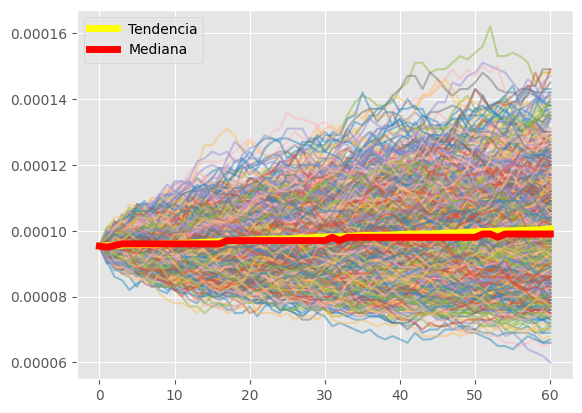

Tasa de caminata por periodo: 0.0008931790381634349
Tasa calculada a través de mu: 0.00083766
Error relativo de tendencia: 0.06627872664736865
Error relativo de mediana: 0.24294679612828995


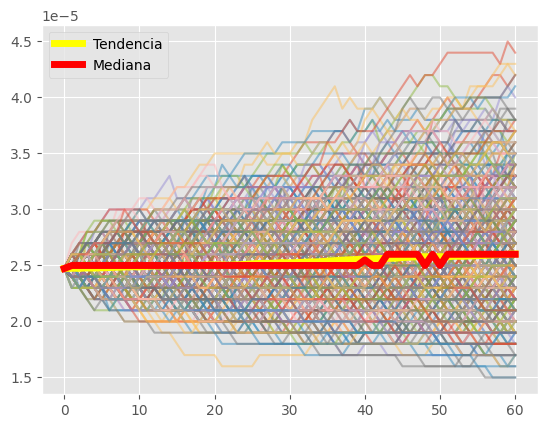

Tasa de caminata por periodo: 0.0008606837245057146
Tasa calculada a través de mu: 0.000818744762
Error relativo de tendencia: 0.05122348801752041
Error relativo de mediana: 0.027744198347222096


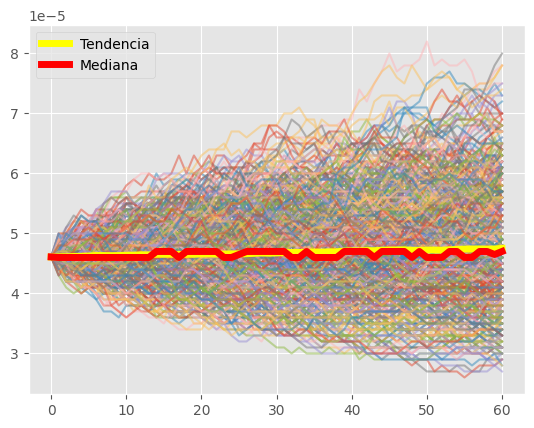

Tasa de caminata por periodo: 0.0005066723522281086
Tasa calculada a través de mu: 0.0005919346
Error relativo de tendencia: 0.14403997970703428
Error relativo de mediana: 0.45170815912390294


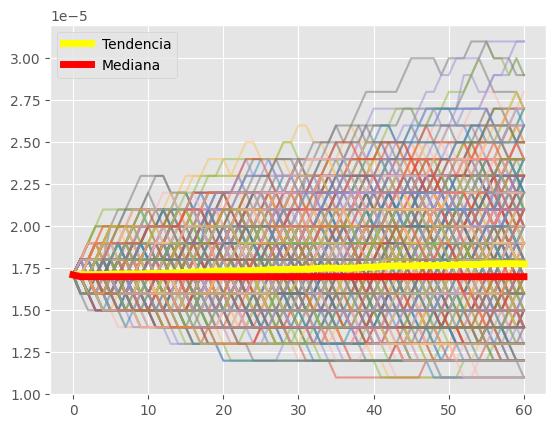

Tasa de caminata por periodo: 0.0006216895075652594
Tasa calculada a través de mu: 0.000402123
Error relativo de tendencia: 0.5460182769084568
Error relativo de mediana: 1.2509960614935531


In [13]:
for h in range(len(lista_df_resultados)):
    df = lista_df_resultados[h]
    # Graficando todas las columnas, pero sin agregar etiquetas para leyenda
    for columna in df.columns:
        if ((columna != 'Tendencia') or (columna != 'Mediana')):
            plt.plot(df.index, df[columna], alpha=0.5)

    # Graficando y agregando etiqueta solo para la columna 'Tendencia'
    linea_tendencia, = plt.plot(df.index, df['Tendencia'], color='yellow', linewidth=5, label='Tendencia')
    
    # Graficando y agregando etiqueta solo para la columna 'Tendencia'
    linea_mediana, = plt.plot(df.index, df['Mediana'], color='red', linewidth=5, label='Mediana')

    # Mostrando solo la leyenda de 'Tendencia'
    plt.legend(handles=[linea_tendencia, linea_mediana])

    # Mostrando el gráfico
    plt.show()
    
    tasa_mu = mus[h]
    tasa_tendencia = (((list(df['Tendencia'])[-1])/(list(df['Tendencia'])[0]))-1)/len(df['Tendencia'])
    tasa_mediana = (((list(df['Mediana'])[-1])/(list(df['Mediana'])[0]))-1)/len(df['Mediana'])
    error_tendencia = abs(abs(tasa_mu-tasa_tendencia)/tasa_mu)
    error_mediana = abs(abs(tasa_mu-tasa_mediana)/tasa_mu)
    print("Tasa de caminata por periodo:",tasa_tendencia)
    print("Tasa calculada a través de mu:", tasa_mu)
    print("Error relativo de tendencia:", error_tendencia)
    print("Error relativo de mediana:", error_mediana)

## Ahora es necesario relacionar el EBITDA de cada periodo con las acciones al final de cada uno de estos periodos.

In [14]:
# Descargar los datos diarios desde el inicio disponible hasta el día actual
data = yf.download('RA.MX', start='1900-01-01')

# Crear una columna de fecha y establecerla como índice
data.reset_index(inplace=True)
data.set_index('Date', inplace=True)

# Definir la fecha de inicio para el filtrado
start_filter_date = '2008-12-01'

# Verificar si la fecha de inicio está en los datos, si no, tomar la más cercana posterior
if start_filter_date not in data.index:
    start_filter_date = data.index[data.index.get_loc(start_filter_date, method='bfill')]

# Generar las fechas cada 4 meses comenzando desde la fecha de inicio
dates = pd.date_range(start=start_filter_date, end=data.index.max(), freq='4M')

# Ajustar las fechas a la más cercana disponible en los datos
adjusted_dates = [data.index[data.index.get_loc(d, method='nearest')] for d in dates]

# Filtrar los datos para estas fechas
filtered_data = data.loc[adjusted_dates]

filtered_data=filtered_data.reset_index()
cols = list(filtered_data.columns)
cols[0] = 'Fecha'
filtered_data.columns = cols
filtered_data=filtered_data.set_index('Fecha')
filtered_data.index = pd.to_datetime(filtered_data.index)
filtered_data.index = filtered_data.index.strftime('%d-%m-%Y')

shares_ra = filtered_data
shares_ra

[*********************100%%**********************]  1 of 1 completed


C:\Users\patri\AppData\Local\Temp\ipykernel_6172\3727252210.py:13: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  start_filter_date = data.index[data.index.get_loc(start_filter_date, method='bfill')]
C:\Users\patri\AppData\Local\Temp\ipykernel_6172\3727252210.py:19: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  adjusted_dates = [data.index[data.index.get_loc(d, method='nearest')] for d in dates]


,Open,High,Low,Close,Adj Close,Volume
Fecha,,,,,,
01-08-2011,31.900000,31.900000,31.889999,31.900000,22.908501,125900
30-11-2011,29.350000,29.370001,29.000000,29.150000,20.933630,50700
30-03-2012,34.560001,35.000000,34.340000,34.860001,25.436245,227861
31-07-2012,45.240002,47.000000,44.110001,45.560001,33.243690,658777
30-11-2012,59.000000,59.000000,58.009998,58.279999,42.525082,239566
01-04-2013,64.239998,67.000000,64.230003,65.459999,47.764099,517004
31-07-2013,76.040001,78.000000,76.040001,77.400002,57.007908,627935
29-11-2013,72.500000,73.199997,71.660004,73.050003,53.803967,682430
31-03-2014,77.010002,77.489998,75.209999,75.660004,56.233528,373791


In [15]:
# Descargar los datos diarios desde el inicio disponible hasta el día actual
data = yf.download('BBAJIOO.MX', start='1900-01-01')

# Crear una columna de fecha y establecerla como índice
data.reset_index(inplace=True)
data.set_index('Date', inplace=True)

# Definir la fecha de inicio para el filtrado
start_filter_date = '2008-12-01'

# Verificar si la fecha de inicio está en los datos, si no, tomar la más cercana posterior
if start_filter_date not in data.index:
    start_filter_date = data.index[data.index.get_loc(start_filter_date, method='bfill')]

# Generar las fechas cada 4 meses comenzando desde la fecha de inicio
dates = pd.date_range(start=start_filter_date, end=data.index.max(), freq='4M')

# Ajustar las fechas a la más cercana disponible en los datos
adjusted_dates = [data.index[data.index.get_loc(d, method='nearest')] for d in dates]

# Filtrar los datos para estas fechas
filtered_data = data.loc[adjusted_dates]

filtered_data=filtered_data.reset_index()
cols = list(filtered_data.columns)
cols[0] = 'Fecha'
filtered_data.columns = cols
filtered_data=filtered_data.set_index('Fecha')
filtered_data.index = pd.to_datetime(filtered_data.index)
filtered_data.index = filtered_data.index.strftime('%d-%m-%Y')

shares_bbajioo = filtered_data
shares_bbajioo

[*********************100%%**********************]  1 of 1 completed


C:\Users\patri\AppData\Local\Temp\ipykernel_6172\1698711399.py:13: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  start_filter_date = data.index[data.index.get_loc(start_filter_date, method='bfill')]
C:\Users\patri\AppData\Local\Temp\ipykernel_6172\1698711399.py:19: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  adjusted_dates = [data.index[data.index.get_loc(d, method='nearest')] for d in dates]


,Open,High,Low,Close,Adj Close,Volume
Fecha,,,,,,
30-06-2017,31.740000,32.000000,31.709999,31.980000,22.276775,1901839
31-10-2017,34.799999,34.830002,34.080002,34.740002,24.199352,1645142
28-02-2018,42.000000,42.000000,40.259998,41.049999,28.594801,12953543
29-06-2018,40.959999,41.759998,40.599998,41.340000,28.887037,4076366
31-10-2018,39.930000,40.029999,39.389999,39.930000,27.901772,3926385
28-02-2019,36.880001,37.410000,36.709999,37.220001,26.008114,1251471
01-07-2019,38.650002,38.980000,38.389999,38.630001,28.189396,2659666
31-10-2019,31.260000,31.299999,30.610001,30.990000,22.614267,1402869
28-02-2020,29.480000,30.969999,27.870001,30.700001,22.402649,2055932


In [16]:
# Descargar los datos diarios desde el inicio disponible hasta el día actual
data = yf.download('GFNORTEO.MX', start='1900-01-01')

# Crear una columna de fecha y establecerla como índice
data.reset_index(inplace=True)
data.set_index('Date', inplace=True)

# Definir la fecha de inicio para el filtrado
start_filter_date = '2008-12-01'

# Verificar si la fecha de inicio está en los datos, si no, tomar la más cercana posterior
if start_filter_date not in data.index:
    start_filter_date = data.index[data.index.get_loc(start_filter_date, method='bfill')]

# Generar las fechas cada 4 meses comenzando desde la fecha de inicio
dates = pd.date_range(start=start_filter_date, end=data.index.max(), freq='4M')

# Ajustar las fechas a la más cercana disponible en los datos
adjusted_dates = [data.index[data.index.get_loc(d, method='nearest')] for d in dates]

# Filtrar los datos para estas fechas
filtered_data = data.loc[adjusted_dates]

filtered_data=filtered_data.reset_index()
cols = list(filtered_data.columns)
cols[0] = 'Fecha'
filtered_data.columns = cols
filtered_data=filtered_data.set_index('Fecha')
filtered_data.index = pd.to_datetime(filtered_data.index)
filtered_data.index = filtered_data.index.strftime('%d-%m-%Y')

shares_gfnorteo = filtered_data
shares_gfnorteo

[*********************100%%**********************]  1 of 1 completed


C:\Users\patri\AppData\Local\Temp\ipykernel_6172\954587598.py:19: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  adjusted_dates = [data.index[data.index.get_loc(d, method='nearest')] for d in dates]


,Open,High,Low,Close,Adj Close,Volume
Fecha,,,,,,
31-12-2008,24.500000,25.000000,24.280001,24.879999,16.176735,508300
30-04-2009,21.700001,22.500000,20.000000,21.700001,14.109134,11888500
31-08-2009,39.759998,40.000000,39.009998,39.189999,25.480961,2963141
31-12-2009,47.840000,48.099998,46.500000,47.840000,31.231754,2191300
30-04-2010,51.119999,53.000000,49.500000,51.119999,33.491821,6181600
31-08-2010,47.490002,47.849998,46.849998,47.490002,31.217407,4000100
30-12-2010,57.180000,59.000000,57.000000,57.180000,37.718441,1288200
29-04-2011,57.970001,58.299999,56.799999,57.970001,38.362186,25177700
31-08-2011,46.160000,50.400002,45.730000,49.950001,33.160191,33192328


In [17]:
# Descargar los datos diarios desde el inicio disponible hasta el día actual
data = yf.download('GFINBURO.MX', start='1900-01-01')

# Crear una columna de fecha y establecerla como índice
data.reset_index(inplace=True)
data.set_index('Date', inplace=True)

# Definir la fecha de inicio para el filtrado
start_filter_date = '2008-12-01'

# Verificar si la fecha de inicio está en los datos, si no, tomar la más cercana posterior
if start_filter_date not in data.index:
    start_filter_date = data.index[data.index.get_loc(start_filter_date, method='bfill')]

# Generar las fechas cada 4 meses comenzando desde la fecha de inicio
dates = pd.date_range(start=start_filter_date, end=data.index.max(), freq='4M')

# Ajustar las fechas a la más cercana disponible en los datos
adjusted_dates = [data.index[data.index.get_loc(d, method='nearest')] for d in dates]

# Filtrar los datos para estas fechas
filtered_data = data.loc[adjusted_dates]

filtered_data=filtered_data.reset_index()
cols = list(filtered_data.columns)
cols[0] = 'Fecha'
filtered_data.columns = cols
filtered_data=filtered_data.set_index('Fecha')
filtered_data.index = pd.to_datetime(filtered_data.index)
filtered_data.index = filtered_data.index.strftime('%d-%m-%Y')

shares_gfinburo = filtered_data
shares_gfinburo

[*********************100%%**********************]  1 of 1 completed


C:\Users\patri\AppData\Local\Temp\ipykernel_6172\1291917342.py:19: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  adjusted_dates = [data.index[data.index.get_loc(d, method='nearest')] for d in dates]


,Open,High,Low,Close,Adj Close,Volume
Fecha,,,,,,
31-12-2008,16.469999,16.500000,16.000000,16.174999,13.172703,448400
30-04-2009,19.000000,19.225000,18.365000,18.500000,15.066154,2255800
31-08-2009,17.905001,18.150000,17.500000,17.915001,14.769991,2084448
31-12-2009,19.514999,19.715000,19.000000,19.299999,15.911850,3277800
30-04-2010,20.709999,21.245001,20.424999,20.709999,17.074322,9602800
31-08-2010,24.389999,24.500000,23.850000,24.389999,20.391289,3004400
30-12-2010,27.045000,27.090000,26.674999,27.045000,22.611006,533200
29-04-2011,29.995001,31.004999,29.500000,30.695000,25.662594,3246600
31-08-2011,23.400000,25.900000,23.400000,25.049999,21.162613,1020020


In [18]:
shares = [shares_ra,shares_bbajioo,shares_gfnorteo,shares_gfinburo]
for i in range(len(lista_df)):
    df = lista_df[i].reset_index()
    share = shares[i].reset_index()
    resultado = pd.merge(df, share, on='Fecha', how='outer')
#     if len(df)<len(share):
#         share = share.tail(len(df))
#         df_r = pd.concat([df, share], axis=1, ignore_index=True)
#     elif len(share)<len(df):
#         df = df.tail(len(share))
#         df_r = pd.concat([df, share], axis=1, ignore_index=True)
#     else:
#         df_r = pd.concat([df, share], axis=1, ignore_index=True)
#     df_r = df_r[['index','EBITDA','Close']]
#     df_r.columns = [['FECHA','EBITDA','CLOSE']]
#     df_r = df_r.set_index('FECHA')
        
resultado

,Fecha,Net Income,Capital Expenditures,EBITDA,Open,High,Low,Close,Adj Close,Volume
0,01-12-2008,1080.340000,-864.109000,216.231000,NaN,NaN,NaN,NaN,NaN,NaN
1,01-03-2009,911.600000,0.000000,911.600000,NaN,NaN,NaN,NaN,NaN,NaN
2,01-06-2009,2803.400000,-1625.000000,1178.400000,NaN,NaN,NaN,NaN,NaN,NaN
3,01-09-2009,2289.400000,1380.700000,3670.100000,NaN,NaN,NaN,NaN,NaN,NaN
4,01-12-2009,2063.600000,-397.700000,1665.900000,NaN,NaN,NaN,NaN,NaN,NaN
5,01-03-2010,1803.687801,-54.367974,1749.319827,NaN,NaN,NaN,NaN,NaN,NaN
6,01-06-2010,497.232847,-15.168807,482.064040,NaN,NaN,NaN,NaN,NaN,NaN
7,01-09-2010,2732.763505,-33.639120,2699.124385,NaN,NaN,NaN,NaN,NaN,NaN
8,01-12-2010,2769.315847,-117.824099,2651.491748,NaN,NaN,NaN,NaN,NaN,NaN
9,01-03-2011,2018.499535,-31.824654,1986.674881,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
shares = [shares_ra,shares_bbajioo,shares_gfnorteo,shares_gfinburo]
lista_combinados = []
for i in range(len(lista_df)):
    df = lista_df[i].reset_index()
    share = shares[i].reset_index()
    
        # Convertir las columnas 'Fecha' a tipo datetime
    df['Fecha'] = pd.to_datetime(df['Fecha'])
    share['Fecha'] = pd.to_datetime(share['Fecha'])

    # Crear un DataFrame con todas las combinaciones posibles de Fechas de ambos DataFrames
    combined = df.assign(key=1).merge(share.assign(key=1), on='key', suffixes=('_df', '_share')).drop('key', 1)

    # Calcular la diferencia en días entre las Fechas
    combined['fecha_diff'] = (combined['Fecha_df'] - combined['Fecha_share']).abs()

    # Ordenar por Fecha de df y diferencia de Fecha, luego eliminar duplicados
    combined = combined.sort_values(by=['Fecha_df', 'fecha_diff'])
    combined = combined.drop_duplicates(subset=['Fecha_df'])

    # Eliminar la columna de diferencia de Fecha y cualquier otra columna innecesaria
    combined.drop(columns=['fecha_diff'], inplace=True)
    res = combined[['Fecha_df','EBITDA','Adj Close']]
    res.columns = ['Fecha','EBITDA','ACCION']
    lista_combinados.append(res)

C:\Users\patri\AppData\Local\Temp\ipykernel_6172\2927449286.py:9: UserWarning: Parsing '30-11-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  share['Fecha'] = pd.to_datetime(share['Fecha'])
C:\Users\patri\AppData\Local\Temp\ipykernel_6172\2927449286.py:9: UserWarning: Parsing '30-03-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  share['Fecha'] = pd.to_datetime(share['Fecha'])
C:\Users\patri\AppData\Local\Temp\ipykernel_6172\2927449286.py:9: UserWarning: Parsing '31-07-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  share['Fecha'] = pd.to_datetime(share['Fecha'])
C:\Users\patri\AppData\Local\Temp\ipykernel_6172\2927449286.py:9: UserWarning: Parsing '30-11-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  share['Fecha'] = pd.to_datetime(share['Fecha'])
C:\U

In [38]:
r2s = []
ms = []
bs = []
for i in range(len(lista_combinados)):
    df = lista_combinados[i]
    ebitda = list(df['EBITDA'])
    accion = list(df['ACCION'])
    r2 = r2_score(ebitda, accion)
    r2s.append(r2)
    m, b = np.polyfit(ebitda, accion, 1)
    ms.append(m)
    bs.append(b)
    
r2s,ms,bs

([-0.6231876796686939,
  -4.004224333668216,
  -2.0688368769748866,
  -2.9969407470500746],
 [0.029428712332291045,
  0.016888435660982762,
  0.008320842658411327,
  0.0013246035951540423],
 [48.33500468700178,
  9.268758476019071,
  26.669931276205467,
  21.660201387681653])

## También se necesitarán los precios de las IPOs de los demás bancos más adelante

# Aplicando lo anterior a Banamex...

<AxesSubplot: title={'center': 'BANAMEX'}>

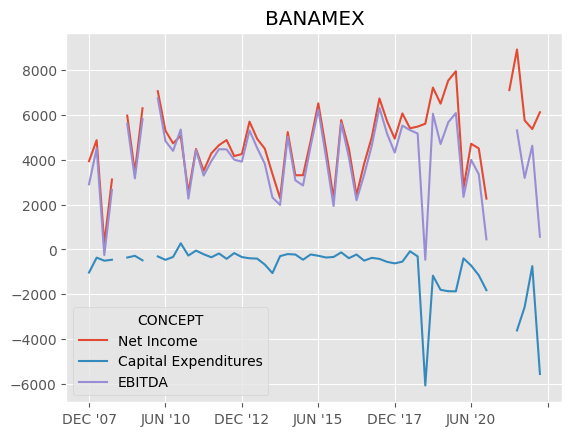

In [21]:
#Depreciaciones y Apreciaciones
cashflow_bnmx = pd.read_excel('CashFlow_BANAMEX.xlsx', skiprows = range(0, 7))
cf_bnmx = cashflow_bnmx.copy()
cf_bnmx = cf_bnmx.drop(0,axis=0)
cols = list(cf_bnmx.columns)
cols[0] = 'CONCEPT'
cf_bnmx.columns = cols
cf_bnmx = cf_bnmx.set_index('CONCEPT')

#Utilidad después de Impuestos
incomestatement_bnmx = pd.read_excel('Income_BANAMEX.xlsx', skiprows = range(0, 7))
is_bnmx = incomestatement_bnmx.copy()
is_bnmx = is_bnmx.drop(0,axis=0)
cols = list(is_bnmx.columns)
cols[0] = 'CONCEPT'
is_bnmx.columns = cols
is_bnmx = is_bnmx.set_index('CONCEPT')

#Obtener EBITDA
df_bnmx = pd.concat([is_bnmx.T[['Net Income']],cf_bnmx.T[['Capital Expenditures']]], axis=1)
df_bnmx['EBITDA'] = df_bnmx['Net Income'] + df_bnmx['Capital Expenditures']
df_bnmx = df_bnmx.iloc[::-1]
cf_bnmx.T['Capital Expenditures']
df_bnmx.plot(title="BANAMEX")

C:\Users\patri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\patri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\patri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\patri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\patri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Line

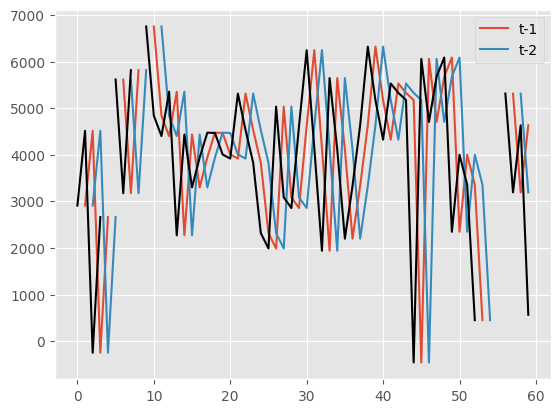

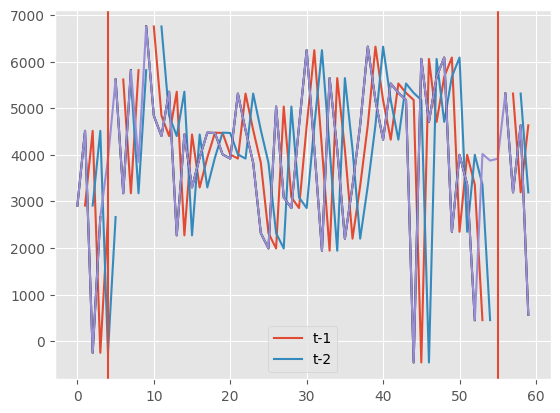

In [22]:
# Creando lags
lags = list(range(1, 3, 1)) 

lagged_frame = pd.DataFrame (data = None, columns = ['t'] + [f't-{d}' for d in lags])
lagged_frame['t'] = df_bnmx['EBITDA'].values

for lag in lags: 
    lagged_frame[f't-{lag}'] = lagged_frame['t'].shift(lag) 

lag_names = [f't-{lag}' for lag in lags] 
lagged_frame[lag_names].plot()
lagged_frame['t'].plot(color = 'black')

lagged_copy = lagged_frame.copy()
lagged_copy2 = lagged_frame.copy()

lagged_copy.dropna(inplace = True)

modelo = LinearRegression()
response = ['t'] 

predictores = sorted(set(lagged_copy.columns).difference(response))

modelo.fit(lagged_copy[predictores], lagged_copy[response]) 

lagged_frame.loc[lagged_frame['t'].isnull()]

df_to_estimate = lagged_frame.loc[lagged_frame['t'].isnull()].copy()
index_datos_a_estimar = df_to_estimate.index.tolist()

lag_names = [f't-{lag}' for lag in lags] 
lagged_frame[lag_names].plot()
lagged_frame['t'].plot(color = 'black')

lagged_copy = lagged_frame.copy()
lagged_copy2 = lagged_frame.copy()

lagged_copy.dropna(inplace = True)

modelo = LinearRegression()
response = ['t'] 

predictores = sorted(set(lagged_copy.columns).difference(response))

modelo.fit(lagged_copy[predictores], lagged_copy[response]) 

lagged_frame.loc[lagged_frame['t'].isnull()]

df_to_estimate = lagged_frame.loc[lagged_frame['t'].isnull()].copy()
index_datos_a_estimar = df_to_estimate.index.tolist()
index_datos_a_estimar

estimaciones = [] 
primera_posicion = min(index_datos_a_estimar) 

#Se hace un reshape porque la libreria skit, trabaja mejor con columnas, ya que en algunos casos puede dar error 
values_reshape = df_to_estimate.loc[primera_posicion, predictores].values.reshape(1, -1)

values_reshape = np.array([x for x in values_reshape[0] if not np.isnan(x)])
values_reshape
# Asegúrate de que el arreglo tenga dos dimensiones

# Asegúrate de que el arreglo tenga dos dimensiones
values_reshape = values_reshape.reshape(1, -1)

values_reshape

#El primer 0 me da un arreglo y el segundo me arroja el dato 
estimaciones.append(modelo.predict(values_reshape)[0][0])

# Colocando las respuestas en un copy 
lagged_copy2.loc[primera_posicion, 't'] = estimaciones[0]
lagged_copy2.loc[index_datos_a_estimar]

for lag in lags: 
    lagged_copy2[f't-{lag}'] = lagged_copy2['t'].shift(lag)

for posicion, index in enumerate(index_datos_a_estimar[1:]):
    #Reshape 
    values_reshape = lagged_copy2.loc[index, predictores].values.reshape(1, - 1)

    #Estimacion 
    estimaciones.append(modelo.predict(values_reshape)[0][0])

    #Colocar estimaciones 
    lagged_copy2.loc[index, 't'] = estimaciones[posicion + 1]
    for lag in lags: 
        lagged_copy2[f't-{lag}'] = lagged_copy2['t'].shift(lag)

lagged_copy2['t'].plot()
plt.axvline(min(index_datos_a_estimar))
plt.axvline(max(index_datos_a_estimar))

datos_con_serie = lagged_copy2['t']
datos_con_serie

lista_net = []
datos_lista = list(datos_con_serie)
for i in range(len(datos_lista)):
    dato = datos_lista[i]
    lista_net.append(dato)
    
datos_con_serie

df_bnmx['EBITDA'] = lista_net

<AxesSubplot: >

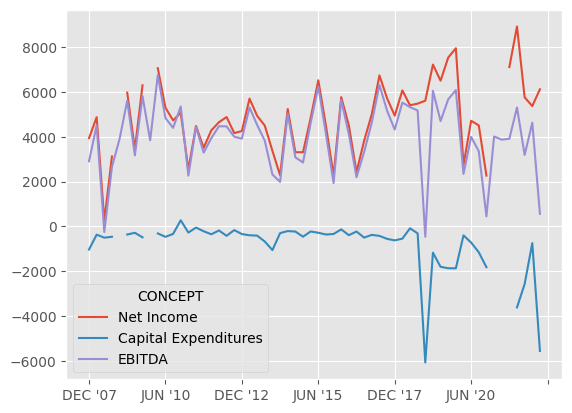

In [23]:
df_bnmx.plot()

In [24]:
l_ebitda = []
l_ebitda.append(df_ra[['EBITDA']].tail(1)['EBITDA'][0])
l_ebitda.append(df_bbajioo[['EBITDA']].tail(1)['EBITDA'][0])
l_ebitda.append(df_gfnorteo[['EBITDA']].tail(1)['EBITDA'][0])
l_ebitda.append(df_gfinburo[['EBITDA']].tail(1)['EBITDA'][0])
l_ebitda.append(df_bnmx[['EBITDA']].tail(1)['EBITDA'][0])
l_ebitda

[1238.006411, 2632.0571529999997, 10361.0, 7231.417546000001, 565.0]

PermissionError: [Errno 13] Permission denied: 'Pesos.csv'

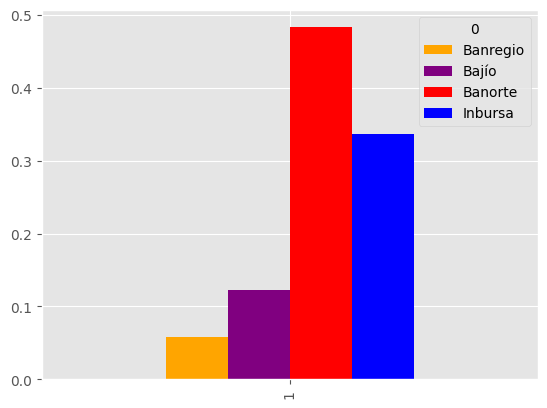

In [115]:
#obtengo total de EBITDA sin Banamex
mcm = np.sum(l_ebitda[0:4])
#La proporción de Banamex
prop_bnmx = l_ebitda[-1]/mcm
#Cada elemento por la proporción
l_pesos = [i * prop_bnmx for i in l_ebitda[0:4]]
l_pesos = [i /l_ebitda[-1] for i in l_pesos]
l_pesos
nombres = ['Banregio','Bajío','Banorte','Inbursa']

df_pesos = pd.DataFrame([nombres,l_pesos])
df_pesos.columns = df_pesos.iloc[0]
df_pesos=df_pesos.drop(index=0)


df_pesos.plot.bar(color=my_colors)
df_pesos.to_csv('Pesos.csv',index=False,encoding="latin-1")
df_pesos

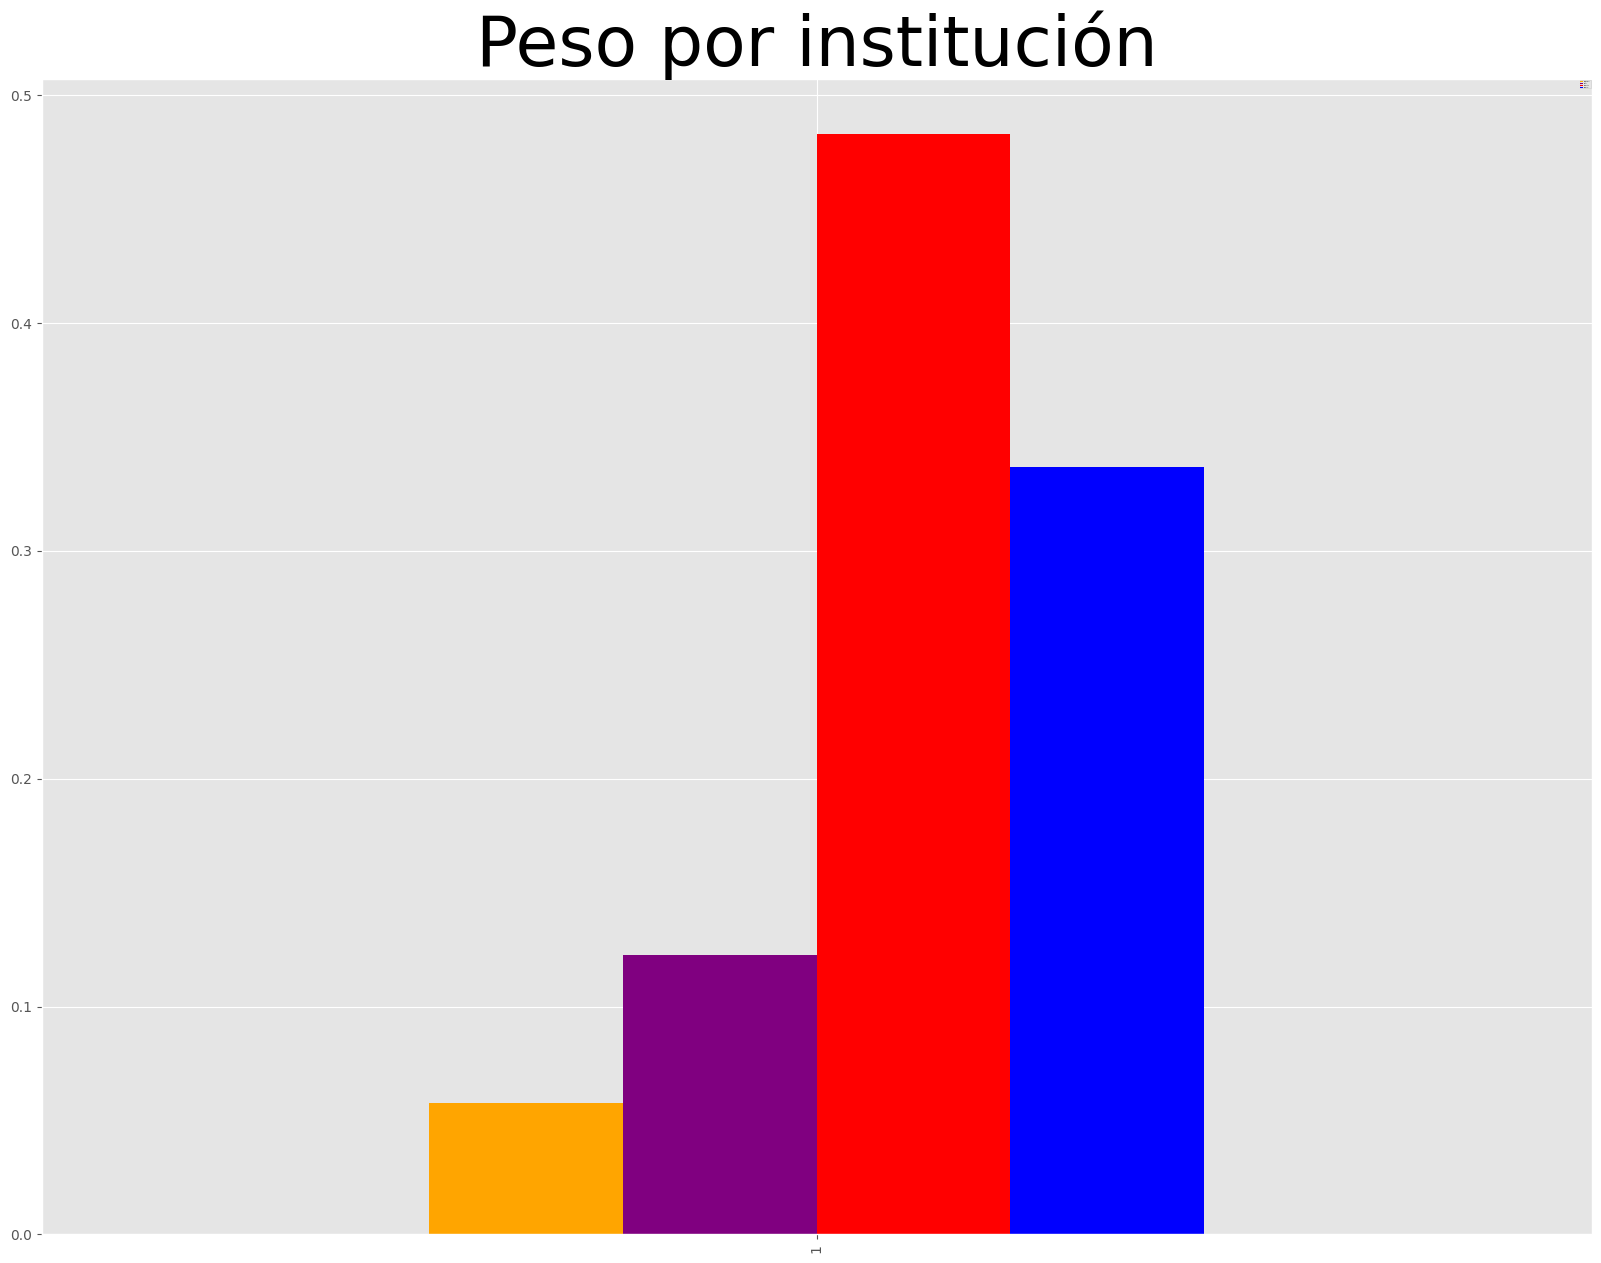

In [126]:
my_colors = list(islice(cycle(['orange', 'purple', 'r', 'b']), None, len(df)))
ax = df_pesos.plot.bar(color=my_colors, title="Peso por institución", figsize=[20,15], grid=True)

# Ajustar el tamaño de la letra del título
ax.set_title("Peso por institución", fontsize=50)
ax.legend(fontsize=0)
# Muestra la gráfica con los ajustes realizados
plt.show()

In [102]:
#Se multiplican los pesos por cada uno de los factores y obtenemos entonces los de banamex
acciones_iniciales = [64500000,57243111,64936274,7950000]
precios_ipo = [32.15,30.5,2.45,1.09]

waccs_w,mus_w,sigmas_w, acciones_w,precios_w,r2s_w,ms_w,bs_w = [],[],[],[],[],[],[],[]
for i in range(len(l_pesos)):
    peso = l_pesos[i]
    wacc = waccs[i]*peso
    mu = mus[i]*peso
    sigma = sigmas[i]*peso
    acciones = acciones_iniciales[i]*peso
    precio = precios_ipo[i]*peso
    r2 = r2s[i]*peso
    m = ms[i]*peso
    b = bs[i]*peso
    waccs_w.append(wacc)
    mus_w.append(mu)
    sigmas_w.append(sigma)
    acciones_w.append(acciones)
    precios_w.append(precio)
    r2s_w.append(r2)
    ms_w.append(m)
    bs_w.append(b)
l_factores = [waccs_w,mus_w,sigmas_w,acciones_w,precios_w,r2s_w,ms_w,bs_w]
#Calculando mu, sigma y WACC de Banamex
df_factores = pd.DataFrame(l_factores)
df_factores.columns = ['RA', 'BBAJIOO', 'GFNORTEO', 'GFINBURO']
df_factores.index = ['WACCS','MUS','SIGMAS','ACCIONES','PRECIOS_IPO','R2','PENDIENTES','INTERSECCIONES']
df_factores['BANAMEX'] = df_factores['RA']+df_factores['BBAJIOO']+df_factores['GFNORTEO']+df_factores['GFINBURO']
df_factores['BANAMEX'].loc['ACCIONES'] = round(df_factores['BANAMEX'].loc['ACCIONES'],0)
df_factores

,RA,BBAJIOO,GFNORTEO,GFINBURO,BANAMEX
WACCS,0.02156636,0.02411861,0.20564806,0.08056870,0.33190173
MUS,0.00004832,0.00010041,0.00028576,0.00013549,0.00056997
SIGMAS,0.00110687,0.00244770,0.01123998,0.00718846,0.02198301
ACCIONES,3720511.76656807,7020024.33899978,31347947.67975454,2678617.12707176,44767101.00000000
PRECIOS_IPO,1.85448765,3.74037572,1.18273604,0.36725694,7.14485635
R2,-0.03594693,-0.49105913,-0.99872977,-1.00976815,-2.53550399
PENDIENTES,0.00169752,0.00207112,0.00401688,0.00044630,0.00823182
INTERSECCIONES,2.78807680,1.13667669,12.87489347,7.29803603,24.09768299


In [103]:
df_factores.to_csv("Factores Banamex.csv")

In [88]:
wacc_bnmx = df_factores.loc['WACCS'].BANAMEX
mu_bnmx = df_factores.loc['MUS'].BANAMEX
sigma_bnmx = df_factores.loc['SIGMAS'].BANAMEX
acciones_bnmx = df_factores.loc['ACCIONES'].BANAMEX

lista_df_caminata = []

df = df_bnmx
tasa = wacc_bnmx
#calculo de pv
lista_pv = []
#npv
npv = 0
for j in range(len(df)):
    lista_ebitda = list(df['EBITDA'])
    xj = lista_ebitda[j]
    den = xj
    num = ((1+tasa)**i)
    pv = den/num
    npv += pv
    lista_pv.append(pv)

df_sim = pd.DataFrame([lista_net,lista_pv])
df_sim = df_sim.T
df_sim.columns = ['EBITDA','PV']
lista_df_caminata.append(df_sim)
# lista_df_caminata

In [127]:
num_caminatas = 100
datos_a_simular = 600

lista_df_resultados = []
for h in range(len(lista_df_caminata)):
    df = lista_df_caminata[h]
    mu=mus[h]
    sigma = sigmas[h]
    shares = acciones_bnmx
    s0 = (df['PV'].sum())/shares
    print(s0)


    res_caminatas = []

    for i in range(num_caminatas):
        caminata=[s0]
        for j in range(datos_a_simular):
            random = np.random.rand()
            inicial = caminata[j]
            sig = inicial*math.exp(
                (mu-((sigma*sigma)/2))+
                sigma * norm.ppf(random)
                               )
            sig = round(sig,6)

            caminata.append(sig)
        res_caminatas.append(caminata)
        print("df #",h,", Caminata #",i)

    df_caminatas = pd.DataFrame(res_caminatas)
    df_caminatas = df_caminatas.transpose()

    l_prom = []
    for i in range(len(df_caminatas)):
        prom = np.mean(df_caminatas.loc[i])
        l_prom.append(prom)
        
    l_median = []
    for i in range(len(df_caminatas)):
        median = np.median(df_caminatas.loc[i])
        l_median.append(median)

    df_caminatas['Tendencia'] = l_prom
    df_caminatas['Mediana'] = l_median

    lista_df_resultados.append(df_caminatas)
len(lista_df_resultados)

0.002266484202358906
df # 0 , Caminata # 0
df # 0 , Caminata # 1
df # 0 , Caminata # 2
df # 0 , Caminata # 3
df # 0 , Caminata # 4
df # 0 , Caminata # 5
df # 0 , Caminata # 6
df # 0 , Caminata # 7
df # 0 , Caminata # 8
df # 0 , Caminata # 9
df # 0 , Caminata # 10
df # 0 , Caminata # 11
df # 0 , Caminata # 12
df # 0 , Caminata # 13
df # 0 , Caminata # 14
df # 0 , Caminata # 15
df # 0 , Caminata # 16
df # 0 , Caminata # 17
df # 0 , Caminata # 18
df # 0 , Caminata # 19
df # 0 , Caminata # 20
df # 0 , Caminata # 21
df # 0 , Caminata # 22
df # 0 , Caminata # 23
df # 0 , Caminata # 24
df # 0 , Caminata # 25
df # 0 , Caminata # 26
df # 0 , Caminata # 27
df # 0 , Caminata # 28
df # 0 , Caminata # 29
df # 0 , Caminata # 30
df # 0 , Caminata # 31
df # 0 , Caminata # 32
df # 0 , Caminata # 33
df # 0 , Caminata # 34
df # 0 , Caminata # 35
df # 0 , Caminata # 36
df # 0 , Caminata # 37
df # 0 , Caminata # 38
df # 0 , Caminata # 39
df # 0 , Caminata # 40
df # 0 , Caminata # 41
df # 0 , Caminata # 42


1

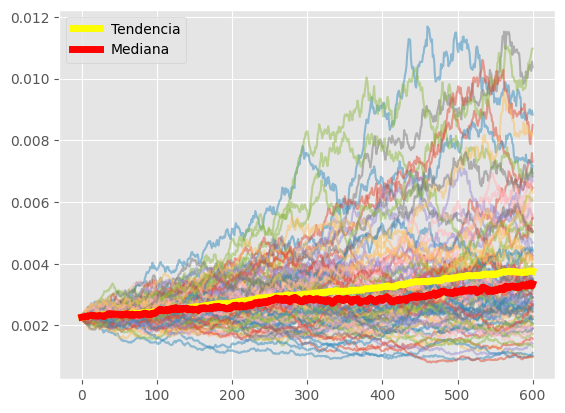

Tasa de caminata por periodo: 0.0010908476713866585
Tasa calculada a través de mu: 0.00083766
Error relativo de tendencia: 0.30225589306718537
Error relativo de mediana: 0.05390650513041734


In [90]:
for h in range(len(lista_df_resultados)):
    df = lista_df_resultados[h]
    # Graficando todas las columnas, pero sin agregar etiquetas para leyenda
    for columna in df.columns:
        if ((columna != 'Tendencia') or (columna != 'Mediana')):
            plt.plot(df.index, df[columna], alpha=0.5)

    # Graficando y agregando etiqueta solo para la columna 'Tendencia'
    linea_tendencia, = plt.plot(df.index, df['Tendencia'], color='yellow', linewidth=5, label='Tendencia')
    
    # Graficando y agregando etiqueta solo para la columna 'Tendencia'
    linea_mediana, = plt.plot(df.index, df['Mediana'], color='red', linewidth=5, label='Mediana')

    # Mostrando solo la leyenda de 'Tendencia'
    plt.legend(handles=[linea_tendencia, linea_mediana])

    # Mostrando el gráfico
    plt.show()
    
    tasa_mu = mus[h]
    tasa_tendencia = (((list(df['Tendencia'])[-1])/(list(df['Tendencia'])[0]))-1)/len(df['Tendencia'])
    tasa_mediana = (((list(df['Mediana'])[-1])/(list(df['Mediana'])[0]))-1)/len(df['Mediana'])
    error_tendencia = abs(abs(tasa_mu-tasa_tendencia)/tasa_mu)
    error_mediana = abs(abs(tasa_mu-tasa_mediana)/tasa_mu)
    print("Tasa de caminata por periodo:",tasa_tendencia)
    print("Tasa calculada a través de mu:", tasa_mu)
    print("Error relativo de tendencia:", error_tendencia)
    print("Error relativo de mediana:", error_mediana)

In [49]:
df_factores.BANAMEX.PENDIENTES

0.008231819703281846

In [91]:
df_final = lista_df_resultados[0][['Tendencia','Mediana']]
pendiente = df_factores.BANAMEX.PENDIENTES
interseccion = df_factores.BANAMEX.INTERSECCIONES
ipo = df_factores.BANAMEX.PRECIOS_IPO
df_final['Prediccion_Tendencia'] = df_final['Tendencia']*pendiente + interseccion
df_final['Prediccion_Mediana'] = df_final['Mediana']*pendiente + interseccion
df_final

C:\Users\patri\AppData\Local\Temp\ipykernel_6172\2224136221.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Prediccion_Tendencia'] = df_final['Tendencia']*pendiente + interseccion
C:\Users\patri\AppData\Local\Temp\ipykernel_6172\2224136221.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Prediccion_Mediana'] = df_final['Mediana']*pendiente + interseccion


,Tendencia,Mediana,Prediccion_Tendencia,Prediccion_Mediana
0,0.002266,0.002266,24.097702,24.097702
1,0.002271,0.002273,24.097702,24.097702
2,0.002270,0.002273,24.097702,24.097702
3,0.002273,0.002269,24.097702,24.097702
4,0.002275,0.002275,24.097702,24.097702
5,0.002274,0.002292,24.097702,24.097702
6,0.002273,0.002278,24.097702,24.097702
7,0.002281,0.002296,24.097702,24.097702
8,0.002287,0.002293,24.097702,24.097702
9,0.002295,0.002309,24.097702,24.097702


<AxesSubplot: title={'center': 'Variación diaria de precio'}, xlabel='Días transcurridos', ylabel='Cambio en centavos'>

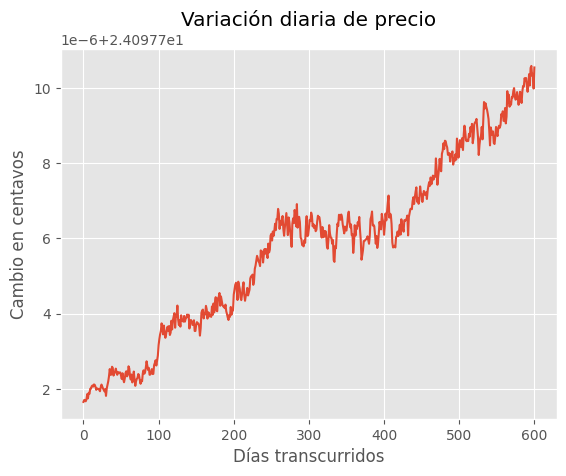

In [104]:
df_final['Prediccion_Mediana'].plot(title="Variación diaria de precio", ylabel="Cambio en centavos", xlabel="Días transcurridos")